In [28]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
from PIL import Image

# license_plates_recognition_train

Detected Number Plate Text: 117  3989


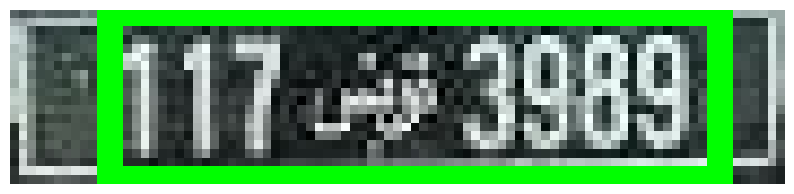

In [3]:
# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define the path to the image containing the number plate
image_path = '0.jpg'  # Replace with your image path

# Load the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect text using EasyOCR
detected_texts = reader.readtext(gray)

# Extract the text from the number plate image
number_plate_text = ''
if detected_texts:
    # Assuming the first detected text is the number plate text
    number_plate_text = detected_texts[0][1]

# Print the detected text
print(f"Detected Number Plate Text: {number_plate_text}")

# Optionally, draw the bounding box around the detected text and display the image
for (bbox, text, prob) in detected_texts:
    # Unpack the bounding box
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple([int(val) for val in top_left])
    bottom_right = tuple([int(val) for val in bottom_right])
    
    # Draw the bounding box on the image
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    
    # Put the detected text above the rectangle
    cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [1]:
# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define the path to the folder containing images
image_folder = '/Users/arul/Documents/My details/Soulpage Assignment/license_plates_recognition_train/'

# Create an empty list to store results
results = []

# Loop through all image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for common image formats
        image_path = os.path.join(image_folder, filename)

        # Load the image
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect text using EasyOCR
        detected_texts = reader.readtext(gray)

        # Extract and process the text from the number plate
        number_plate_text = ''
        if detected_texts:
            # Assuming the first detected text is the number plate (configurable)
            number_plate_text = detected_texts[0][1]

            # Use regular expression to keep only numeric values
            number_plate_text = re.sub(r'[^0-9]', '', number_plate_text)

        # Append results to the list as a dictionary
        results.append({"image_name": filename, "car_number": number_plate_text})

# Create a pandas DataFrame from the results
df = pd.DataFrame(results)

,image_name,car_number
0,63.jpg,135255906
1,823.jpg,126
2,189.jpg,74778151
3,77.jpg,130
4,837.jpg,104
...,...,...
895,0.jpg,1173989
896,806.jpg,123941
897,46.jpg,1093558
898,190.jpg,03339641


# license_plates_detection_train 

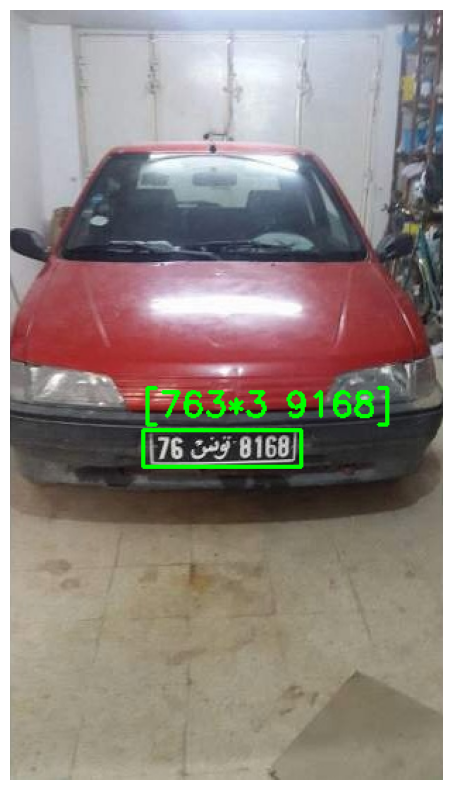

Detected Number Plate Text: [763*3 9168] (Confidence: 0.11)


In [2]:
# Load the image
image_path = '2.jpg'  # Replace with your image path
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use EasyOCR to detect text
reader = easyocr.Reader(['en'])
results = reader.readtext(gray)

# Draw bounding boxes around detected text
for (bbox, text, prob) in results:
    # unpack the bounding box
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple([int(val) for val in top_left])
    bottom_right = tuple([int(val) for val in bottom_right])

    # draw the bounding box on the image
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    # put the detected text above the rectangle
    cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the detected texts
for (bbox, text, prob) in results:
    print(f"Detected Number Plate Text: {text} (Confidence: {prob:.2f})")


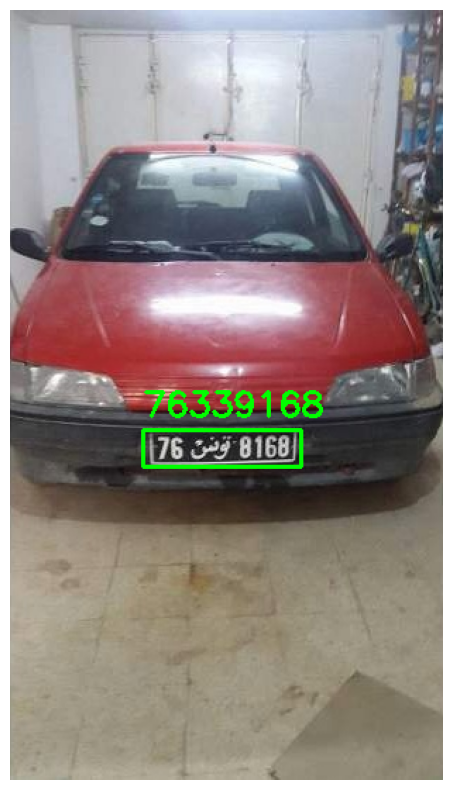

Detected Number Plate Numeric Text: 76339168 (Confidence: 0.11)


In [4]:
# Load the image
image_path = '2.jpg'  # Replace with your image path
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use EasyOCR to detect text
reader = easyocr.Reader(['en'])
results = reader.readtext(gray)

# Draw bounding boxes around detected text
for (bbox, text, prob) in results:
    # Use regular expression to keep only numeric values
    numeric_text = re.sub(r'[^0-9]', '', text)

    if numeric_text:
        # Unpack the bounding box
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple([int(val) for val in top_left])
        bottom_right = tuple([int(val) for val in bottom_right])

        # Draw the bounding box on the image
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        # Put the detected numeric text above the rectangle
        cv2.putText(image, numeric_text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the detected numeric texts
for (bbox, text, prob) in results:
    numeric_text = re.sub(r'[^0-9]', '', text)
    if numeric_text:
        print(f"Detected Number Plate Numeric Text: {numeric_text} (Confidence: {prob:.2f})")


In [5]:
# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define the path to the folder containing images
image_folder = '/Users/arul/Documents/My details/Soulpage Assignment/license_plates_detection_train/'

# Create an empty list to store results
results = []

# Loop through all image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for common image formats
        image_path = os.path.join(image_folder, filename)

        # Load the image
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect text using EasyOCR
        detected_texts = reader.readtext(gray)

        # Extract and process the text from the number plate
        number_plate_text = ''
        if detected_texts:
            for _, text, _ in detected_texts:
                # Use regular expression to keep only numeric values
                numeric_text = re.sub(r'[^0-9]', '', text)
                if numeric_text:
                    number_plate_text = numeric_text
                    break  # assuming we are interested in the first numeric text detected

        # Append results to the list as a dictionary
        results.append({"image_name": filename, "car_number": number_plate_text})

# Create a pandas DataFrame from the results
df1 = pd.DataFrame(results)

# Save the DataFrame to a CSV file
# output_csv = 'detected_car_numbers.csv'
# df.to_csv(output_csv, index=False)

# print(f"Results saved to {output_csv}")
df1.head()

,image_name,car_number
0,63.jpg,85
1,823.jpg,02
2,189.jpg,8
3,77.jpg,20170203
4,837.jpg,120860


In [6]:
print(detected_texts)

[([[124, 238], [212, 238], [212, 262], [124, 262]], '87 647 9294', 0.1320024113452043)]


In [7]:
number_plate_text

'876479294'

In [8]:
df1.tail()

,image_name,car_number
895,52.jpg,407
896,806.jpg,912998
897,46.jpg,62391646
898,190.jpg,195
899,184.jpg,876479294


In [10]:
df1.iloc[0]

image_name    63.jpg
car_number        85
Name: 0, dtype: object

In [24]:
# Define paths
csv_file_path = 'Licplatesdetection_train.csv'
images_folder_path = '/Users/arul/Documents/My details/Soulpage Assignment/license_plates_detection_train/'
output_folder_path = '/Users/arul/Documents/My details/Soulpage Assignment/New Folder1/'

# Create output directory if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Iterate through each row in the CSV
for index, row in df.iterrows():
    img_id = row['img_id']
    x1, y1, x2, y2 = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    
    # Construct the image file path
    img_path = os.path.join(images_folder_path, img_id)
    
    # Open the image
    with Image.open(img_path) as img:
        # Crop the image
        cropped_img = img.crop((x1, y1, x2, y2))
        
        # Save the cropped image
        output_img_path = os.path.join(output_folder_path, img_id)
        cropped_img.save(output_img_path)
        
    print(f"Cropped and saved {img_id}")

print("All images have been cropped and saved.")


Cropped and saved 1.jpg
Cropped and saved 10.jpg
Cropped and saved 100.jpg
Cropped and saved 101.jpg
Cropped and saved 102.jpg
Cropped and saved 103.jpg
Cropped and saved 104.jpg
Cropped and saved 105.jpg
Cropped and saved 106.jpg
Cropped and saved 107.jpg
Cropped and saved 108.jpg
Cropped and saved 109.jpg
Cropped and saved 11.jpg
Cropped and saved 110.jpg
Cropped and saved 111.jpg
Cropped and saved 112.jpg
Cropped and saved 113.jpg
Cropped and saved 114.jpg
Cropped and saved 115.jpg
Cropped and saved 116.jpg
Cropped and saved 117.jpg
Cropped and saved 118.jpg
Cropped and saved 119.jpg
Cropped and saved 12.jpg
Cropped and saved 120.jpg
Cropped and saved 121.jpg
Cropped and saved 122.jpg
Cropped and saved 123.jpg
Cropped and saved 124.jpg
Cropped and saved 125.jpg
Cropped and saved 126.jpg
Cropped and saved 127.jpg
Cropped and saved 128.jpg
Cropped and saved 129.jpg
Cropped and saved 13.jpg
Cropped and saved 130.jpg
Cropped and saved 131.jpg
Cropped and saved 132.jpg
Cropped and saved 

In [27]:
import os
import easyocr
import re
import pandas as pd

# Set the path to the folder containing images
images_folder_path = '/Users/arul/Documents/My details/Soulpage Assignment/New Folder1/'

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Function to extract numeric values from a string
def extract_numeric(text):
    numeric_values = re.findall(r'\d+', text)
    return ''.join(numeric_values)

# Create an empty list to store image names and extracted numbers
data = []

# Iterate through each image in the folder
for filename in os.listdir(images_folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):  # Check if file is an image
        # Construct the image file path
        img_path = os.path.join(images_folder_path, filename)

        # Use EasyOCR to extract text from the image
        result = reader.readtext(img_path)

        # Extract numeric values and append to data list
        for detection in result:
            numeric_text = extract_numeric(detection[1])
            data.append([filename, numeric_text])

# Create a DataFrame from the data list
df3 = pd.DataFrame(data, columns=['Image Name', 'Extracted Number'])

# # Save the DataFrame to a CSV file
# df.to_csv('extracted_numbers.csv', index=False)

# print("Data saved to extracted_numbers.csv")
df3

,Image Name,Extracted Number
0,63.jpg,5
1,63.jpg,8265
2,823.jpg,127706
3,189.jpg,5779
4,77.jpg,94333458
...,...,...
1288,806.jpg,912998
1289,46.jpg,62251646
1290,190.jpg,195
1291,190.jpg,668


In [43]:
df3.drop_duplicates(subset=['Image Name'], inplace=True)

In [45]:
df3.head()

,Image Name,Extracted Number
0,63.jpg,5
2,823.jpg,127706
3,189.jpg,5779
4,77.jpg,94333458
5,837.jpg,12084640


# Test Set

In [31]:
# Function to perform license plate detection
def detect_license_plate(image_path):
    # Load image
    img = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Use Haar Cascade Classifier for license plate detection
    plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(100, 25))
    
    return plates

# Function to perform character recognition
def recognize_characters(image_path):
    # Load image
    img = cv2.imread(image_path)
    
    # Use EasyOCR to recognize characters
    reader = easyocr.Reader(['en'])
    result = reader.readtext(img)
    
    return result

# Function to extract numeric values from a string
def extract_numeric(text):
    numeric_values = re.findall(r'\d+', text)
    return ''.join(numeric_values)

# Set the path to the folder containing test set images
test_set_folder = '/Users/arul/Documents/My details/Soulpage Assignment/test/test/'

# Create an empty list to store the results
results = []

# Iterate through each image in the test set folder
for image_name in os.listdir(test_set_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        # Path to the image
        image_path = os.path.join(test_set_folder, image_name)
        
        # Perform license plate detection
        plates = detect_license_plate(image_path)
        
        # Perform character recognition
        character_results = recognize_characters(image_path)
        
        # Store results in the list
        for detection in character_results:
            plate_number = extract_numeric(detection[1])
            results.append([image_name, plate_number])

# Create a pandas DataFrame from the results
df5 = pd.DataFrame(results, columns=['Image Name', 'Plate Number'])
df5.head()

,Image Name,Plate Number
0,1019.jpg,4158
1,1019.jpg,4820
2,1025.jpg,1529438
3,1031.jpg,181359656
4,957.jpg,26


In [37]:
# Assuming df5 is your DataFrame
df5.drop_duplicates(subset=['Image Name'])

,Image Name,Plate Number
0,1019.jpg,4158
2,1025.jpg,1529438
3,1031.jpg,181359656
4,957.jpg,26
6,943.jpg,12
...,...,...
404,966.jpg,
406,972.jpg,
409,1028.jpg,
413,1014.jpg,1495331332


In [39]:
df5.head()

,Image Name,Plate Number
0,1019.jpg,4158
2,1025.jpg,1529438
3,1031.jpg,181359656
4,957.jpg,26
6,943.jpg,12


In [40]:
df5.isnull().sum()

Image Name      0
Plate Number    0
dtype: int64